# CNN의 개요

- CNN은 사람(동물)은 눈에서 사물을 인지하는 절차는 적용하여 만든 네트워크 구조이다
- 합성곱 인공 신경망
  - Consolution Neural Network(CNN)
- History
  - 1989 : Lecun 논문에서 개념 발표
  - 2006 : CNN을 일반화한 논문 발표
  - 2012 : 
    - 영상 처리/분류/인식 분야에 가장 탁월한 성능을 낸다 
    - 이를 기반은 여러개의 모델들이 파생되서 나왔다

# 신경망의 구조(네트워크 구성)



```
# ANN
ㄴ 입력층
ㄴ 은닉층(중간층)
ㄴ 출력층
```



```
# DNN (은닉층이 2개 이상)
ㄴ 입력층
ㄴ 은닉층(중간층)
ㄴ ...
ㄴ 은닉층(중간층)
ㄴ 출력층
```



```
# CNN -> 파생상품
# 합성곱층과 풀링층을 몇번, shape 구성등등 다 자유
ㄴ 입력층.        : input layer
ㄴ 은닉층(중간층). : hidden layer
  ㄴ 합성곱층
  ㄴ 풀링층
  ㄴ 합성곱층
  ㄴ 풀링층
  ㄴ ....
  ㄴ 합성곱층.    : Convoultion Layer
  ㄴ 풀링충.     : Pooling Layer 
  ㄴ 전결합층    : Fully Connected Layer
ㄴ 출력층.      : output layer
```



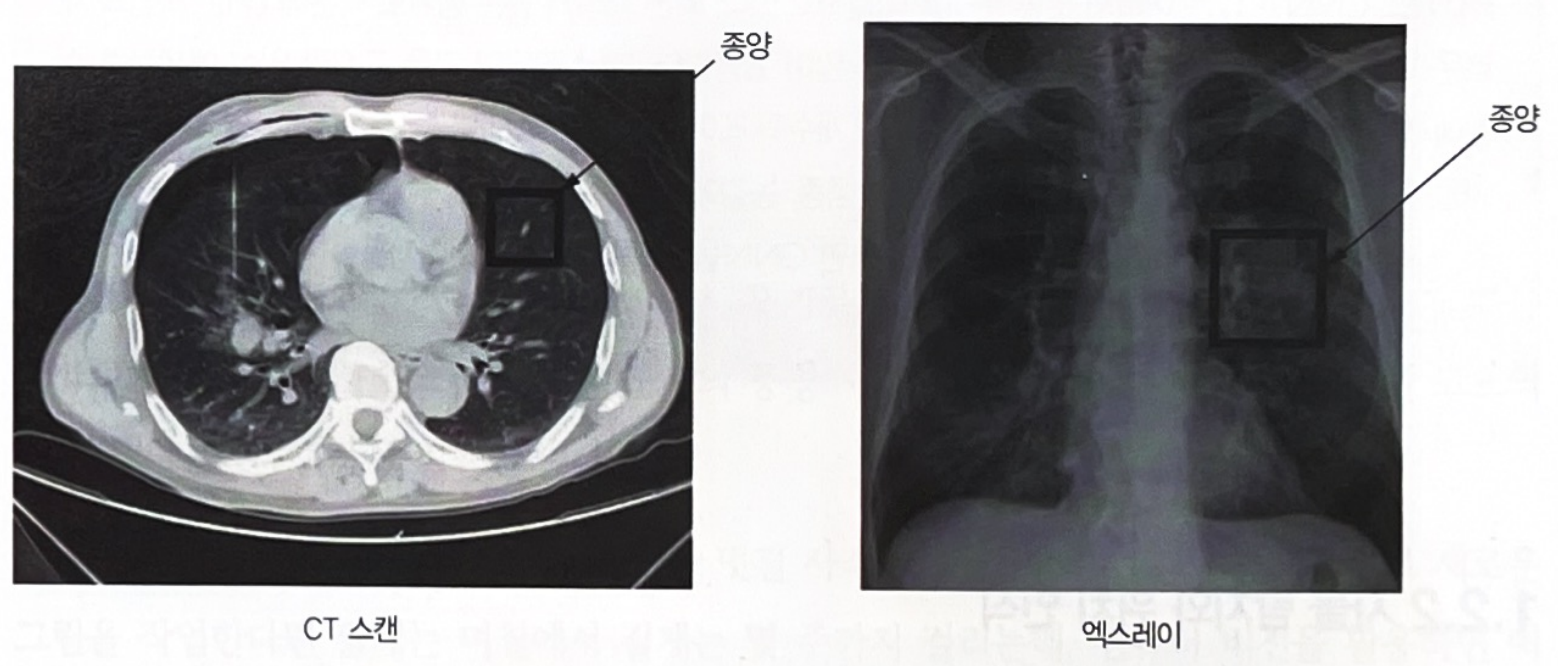

In [3]:
from IPython.display import Image
Image('/content/drive/MyDrive/빅데이터_딥러닝/Day02/비전처리/비전_6_종양식별사진.png')

# 원리및 특징

- 이미지 관점
  - 이미지 내의 **공간 정보를 특징으로 학습**
  - 이미지 내의 **인접 정보(이미지)**을 특징으로 학습

- 예시
  - 데이터 MNIST 
  - 2D 이미지 크기가 ( , )
  - 이런 이미지상의 공간 정보를 추출하기 위해서는, 해당위치만 바라보고 정보를 추출해야한다 => 일종의 필터가 필요하다. 필터의 크기를 ( , )으로 잡았다
  - 원본 이미지 왼쪽 상단부터 ( , )에 겹치는 이미지 정보를 추출(특징 추출)
  - 이런 과정으로 계속해서 옆으로 이동하면서 반복 => 오른쪽끝에 도착하면 밑으로 조금 내려가서 맨앞부터 다시 시작
  - 이미지를 이해하게 된다
    - 이미지의 크기를 줄이고-> 다시 반복
    

# 입력층

- 입력 : 원본 이미지
- 데이터를 특정 크기로 고정 ( , )
  - 원데이터의 크기가 모두 다르면 통일시키는 전처리 과정이 필요하다 -> opencv, pillow 활용
- 만약 원본데이터가 불특정하다면 -> 전처리를 통해서 조정 (같은 크기에 같은 비율로 있다면 정확도가 아주 높을것이다)
- 입력 데이터는 아래처럼 표현될것이다
  - NHWC (개수, 높이, 가로, 채널) or NCHW (개수, 채널, 높이, 가로)
    - **channel last**, channel first
  - (55000, 28, 28, 1) <- MNIST를 **keras**에 학습시킬 때 포멧
- 색상기준
  - 이미지가 grayscale 이면 -> 1채널
  - 이미지가 color 이면 -> 3채널 (R, G, B)
  - MNIST는 흑백 이미지이므로 -> grayscale -> 1채널

# 은닉층

- 이미지는 층을 지나갈수록 구성에 따라 작아질수 있다
  - 이미지 크기값:(h,w) => (28,28) -> (14,14) -> (7,7)

## 합성곱층 - 이미지 특징 추출

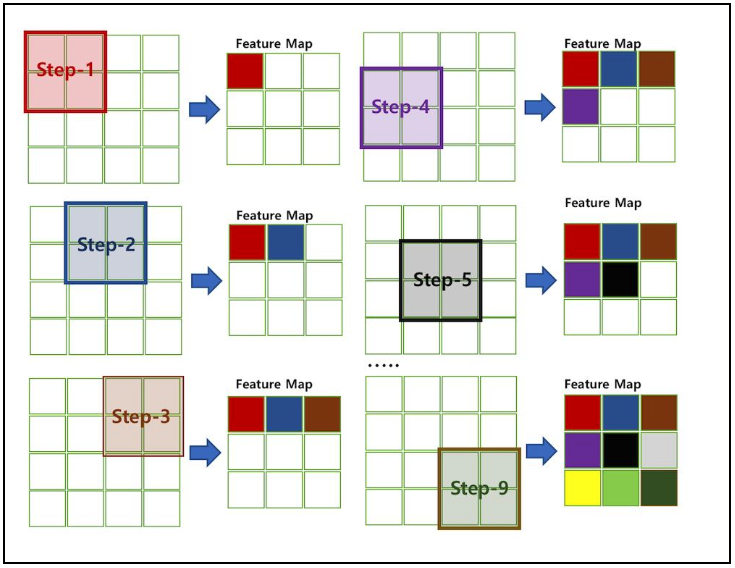

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/고려대_AI개발을위한머신러닝딥러닝활용과정/학생용/res/cnn2.png')

# Step1 ~Step9까지 이미지(4,4) 위에서 걸쳐있는 (2,2)의 행렬을 커널, 필터라고 한다
# 커널이나 필터는 특정값을 가지고 이미지내 공간을 이동(stride)한다
# 이동하면서 커널과 겹쳐져 있는 이미지 데이터와 특정 연산을 수행한다 => 특징 추출
# 이렇게 특징들을 모아서 하나의 Feature Map을 생성한다(이미지 (3,3)) => 이미지가 줄어들었다
# 이런 Feature map(행렬)들이 여러개가 만들어 질것이다(설계를 그렇게 하면됨, 만들기 나름)

- 합성곱층의 구성요소
  - 입력(x) : 이전층에서 나온 최종 산출물
    - ex) 최초 입력층, 전단계인 풀링충 등...
    - 입력층의 최종 **shape**을 기억해야 한다(설계시작성)
  
  - ** 커널(필터) ** : 이미지 공간상에서 특징을 뽑을 때, 그 경계 크기(커널사이즈)를 가지고 있다
  **가중치를 값으로 가지고 있다(가중치를 파라미터로 가진)**
    - 커널은 ( 행렬 )이다 -> ( 행렬 ) 이므로 값을 가지고 있다
    - 커널이 가지고 있는 값 -> **가중치**
    - ** 가중치를 파라미터로 가진 커널 **
      - 가중치값은 다음과 같이 구성할 수 있다
      - 직접개발
        - 수직 커널, 수평 커널, 가우시안 커널등등.
      - 특정 함수(통계, 분포등등 수학함수)
      - 랜덤(의미없다)
        - 학습하면 전부 조정된다

    - **편향(bias**)도 존재한다
      - y = ax + b
      - y절편이라고 생각하면 쉽다
  
  - ** stride ** : 커널이 이미지상을 이동(슬라이딩)할때 그 크기(** 스트라이드 **)
  
  - ** padding ** : ** 패딩 **, 이미지의 크기, 커널의 크기, 이동량에 따라서는 경계에 도착 못하거나, 넘어가거나
    - SAME -> feature map(합성곱의 특성맵) -> 원본과 동일한 사이즈
    - VAILD -> feature map -> 통산 우너본보다 작은 사이즈
  
  - 출력
    - ** feature map(특징맵) **(특징값을 가진 행렬)
      - 이 데이터는 선형 구조를 가진다
    - ** activation map **(활성화함수를 통과한 경우, 활성화 맵)
      - 이 데이터를 비선형으로 변형하는게 활성화 함수의 주업무이다
        - 왜? : 깊이 감을 주기 위해서 데이터를 흐트러 놓는다(용도마다 다르다)
        - relu, sigmoid, softmax, tanh, Rrelu,...


### kernel, filter

- 이미지의 공간상에 특징을 추출하는 도구
- 외곽선 검출, 명암 분포등을 이미지의 특징을 추출할수 있다
- 가중치 W를 파라미터로 가진 필터(커널)
  - 딥러닝 학습 행위를 통해서 계속해서 변화한다
- 원본이미지와 커널이 겹칠때 이미지 공간상의 정보를 추출하는이 때 수행되는 연산은 **  **

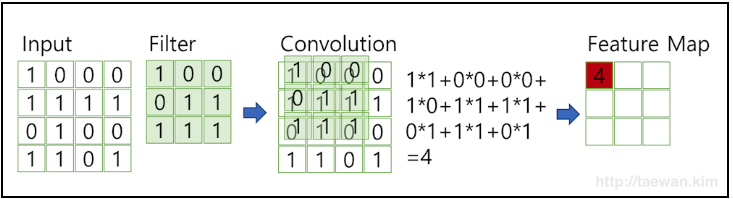

In [ ]:
Image('/content/drive/MyDrive/고려대_AI개발을위한머신러닝딥러닝활용과정/학생용/res/cnn1.png')
# 필터가 이미지 공간상에서 특징을 추출하는 방식
# 2개의 행렬(원본이미지(필터에 겹쳐진 부분만), 필터)이 연산(행렬곱)
# Wx, 아래 그림에서는 xW를 수행했는데 아래 그램에서는 순서는 상관없다
# 아래 데이터는 GrayScale 이미지 (회색톤), 1채널 사용

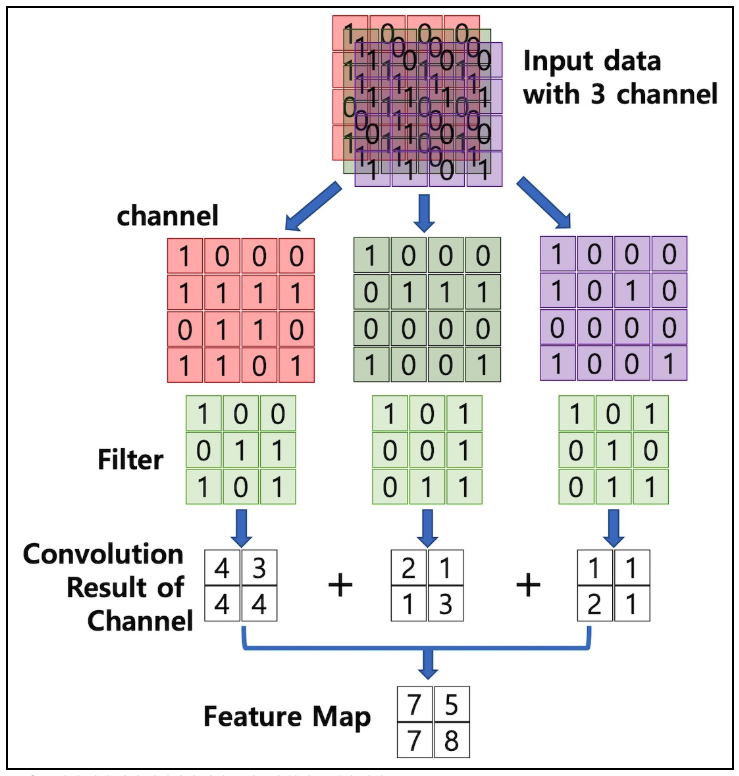

In [ ]:
Image('/content/drive/MyDrive/고려대_AI개발을위한머신러닝딥러닝활용과정/학생용/res/cnn4.png', width=500)
# 칼라 이미지인 경우 3채널을 가지고 있다 (R, G, B)
# 설계자 의도대로 구현할수 있다

### stride

- 커널을 움직일대 그 크기, 이동량
- 윈도우를 슬라이딩하는 크기
- 이미지가 2D이므로, 가로, 세로의 2개의 방향이 필요
- 이동량은 설계자 의도대로 구성

### padding

- 커널이 이미지 원본상으로 슬라이딩 하여 이동할대, 이미지의 크기, 커널의 크기, 이동량등에 따라 경계선에 도착 못하거나 하는 상황이 발생할수 있다
  - 더 이동해서 추출해야 하는데 공간이 부족하다
- 종류
  - SAME : 커널이 모두 특징을 추출한후 그 결과가 이미지와 동사이즈로 나와야 한다
  - VAILD: 유효 범위만으로 추출해라 -> 원본 이미지보다 작게 나온다(확률이 높다)
  - 설계자의 의도대로 구성

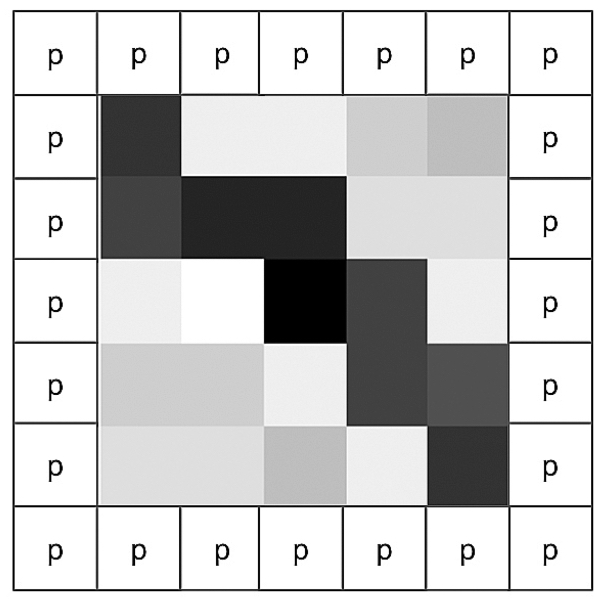

In [ ]:
Image('/content/drive/MyDrive/고려대_AI개발을위한머신러닝딥러닝활용과정/학생용/res/cnn5.jpeg')
# p값은 동일, 일반적으로 0
# 전체 테두리를 넣어서 보정 -> 경계선 추출이라는 부분이 연관성을 가지게 된다

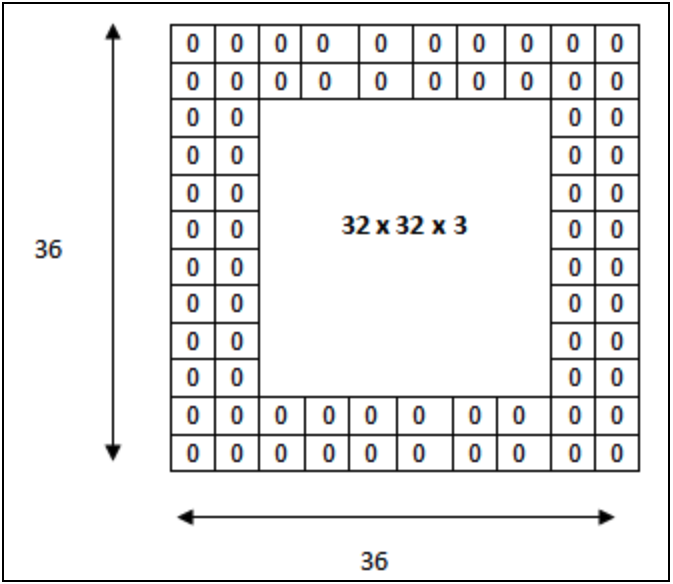

In [ ]:
Image('/content/drive/MyDrive/고려대_AI개발을위한머신러닝딥러닝활용과정/학생용/res/cnn6.png')

# 패딩으로 보정되는 픽셀값은 0

### Weight, bais

- CNN 코드 작성시 확인
- 학습을 통해서 구체적으로 알고자 하는 값이다-> 최적의 결과를 위한 W, b를 구하는것

## 풀링층 - 이미지 특징 강화

- 역활
  - 풀링층으로 들어오는 데이터를 강화하는 목적을 가진다
    - 입력 데이터가 이미지의 특징 데이터이므로, 특징을 강화하는데 목적이 있다
  - 특징을 강화한다
  - 기법
    - ** 최대풀링(외곽선이 강해진다) **
    - ** 평균풀링(전체적으로 뿌해진다) **
    - 최소 풀링(거의 없다)
  - 커널이 가중치를 가질 필요가 없다
    - 최대, 평균이라는 계산식은 이미 정의가 되어 있다
    - **커널의 크기만 있으면 된다**
    - stride
    - padding

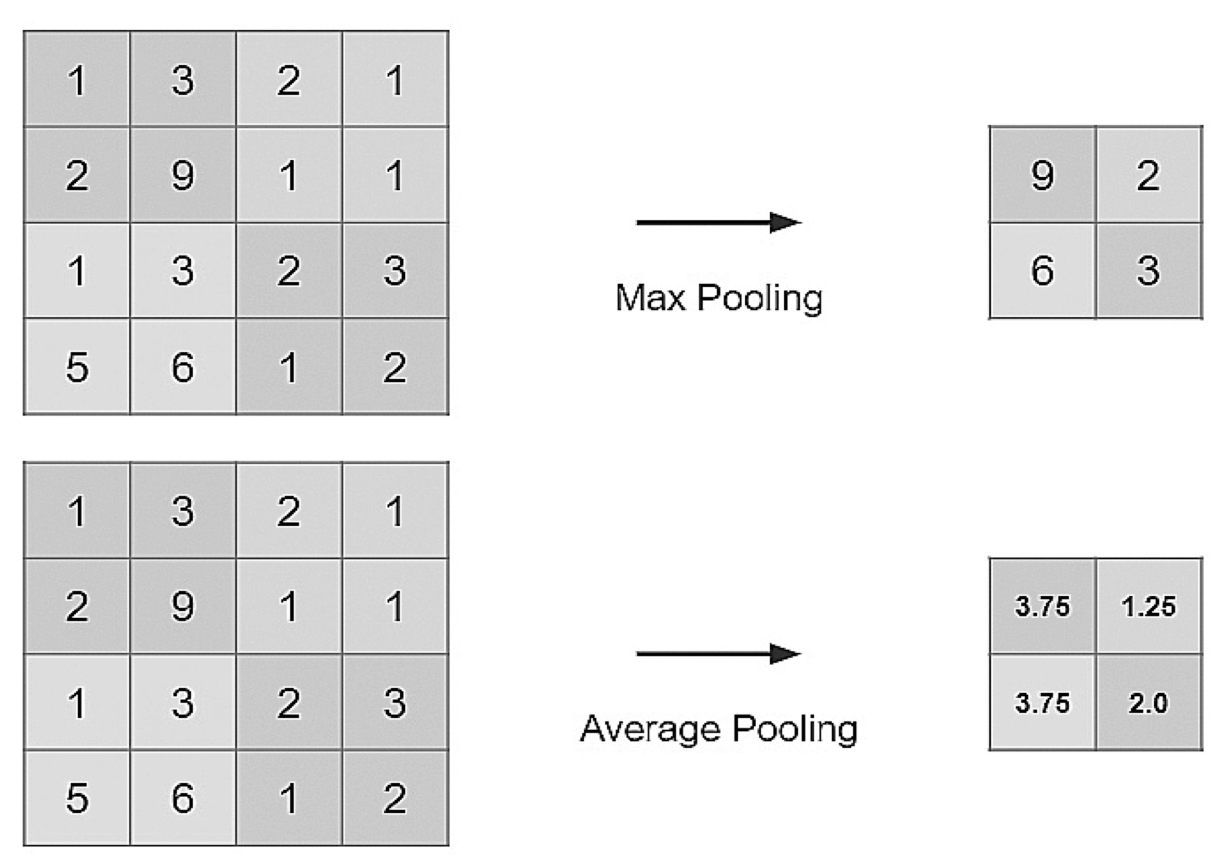

In [ ]:
Image('/content/drive/MyDrive/고려대_AI개발을위한머신러닝딥러닝활용과정/학생용/res/cnn7.jpeg', width=500)
# 커널 크기 (2,2),stride(2,2), padding:vaild
# 최대풀링 -> 특성이 더 진한색으로 강화된다(선이 더 선명등등..)

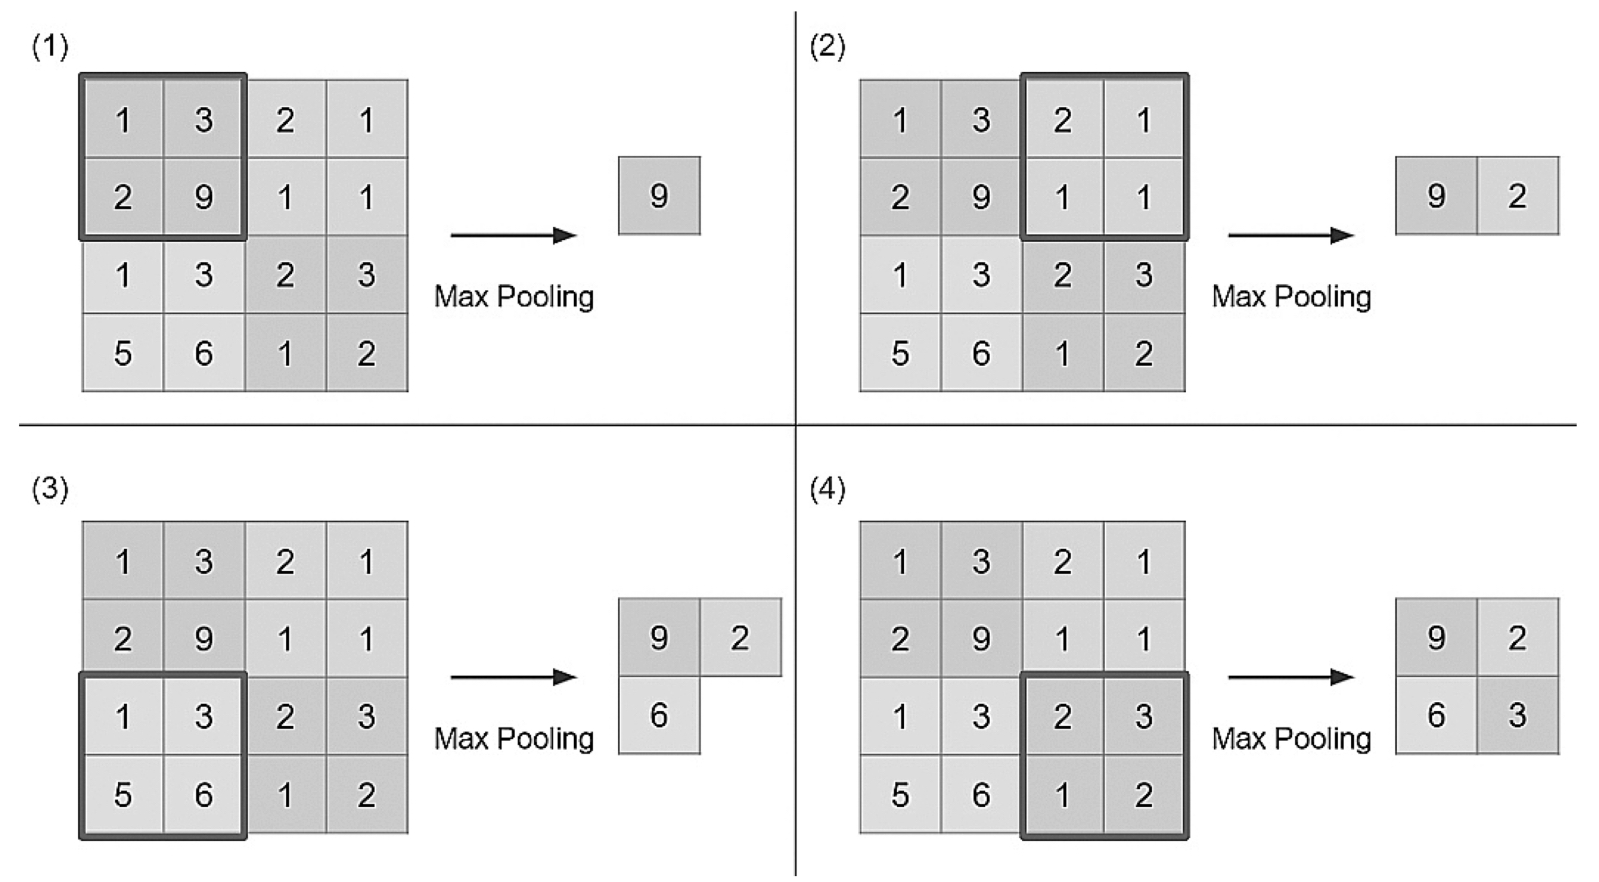

In [ ]:
Image('/content/drive/MyDrive/고려대_AI개발을위한머신러닝딥러닝활용과정/학생용/res/cnn8.jpeg')

## 전결합층 - 결과에 수렴하는 중간역활, 완충역활 - Flattern layer



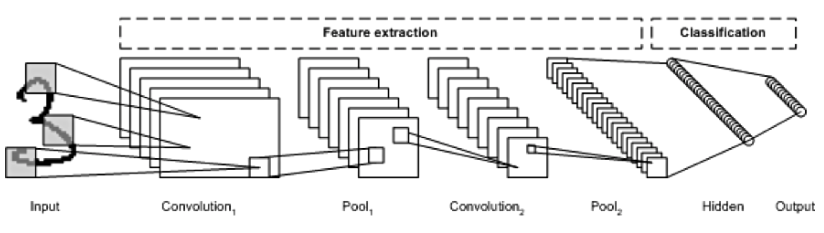

In [ ]:
Image('/content/drive/MyDrive/고려대_AI개발을위한머신러닝딥러닝활용과정/학생용/res/cnn9.png')

# 숫자 3이라는 이미지를 합성곱층과 풀링층을 여러번 통과하면서 계속해서 이것이 3이라는 것을 
# 3이라는 이미지의 특징을 계속 이해하게 된다(알게된다)
# 이런 데이터가 특정값 3에 수렴하기 위해서는 많이 부풀어진 데이터를 수렴해야 한다
# 전결합층을 통해서 shape을 변경(차원을 줄이고), 축소(개수를 줄인다) 해야 한다

- 입력
  - 이전층(단계)의 산출물
  - 풀링층을 통과한 feature map
- 목적
  - 출력층으로 점진적인 수렴을 하기 위해서 1차원으로 전개하는 층이다
  - 2D -> 1D : 펴준다(flattern) 
- 출력
  - 최종 산출물인 출력층으로 연결

# 출력층

- 입력 데이터 x는 3이다
  - ex) mnist 데이터 (손글씨)를 0~9까지 65000개의 데이터가 있다
  - 이것을 이용해 학습을 수행한후 임의의 손글씨중 숫자를 인식하라
  - 입력 x가 왔고, 모델은 이것을 5로 판단했다 (0:0.5%, 1:2%, ....,5:76%,.9:10%)
    - 5가 가장 높은 확률을 제시하므로 이 이미지 x는 5이다
    - **다중분류 : softmax() 활성화 함수 사용**
    - **이진분류 : sigmoid() 활성화 함수 사용**

- **입력데이터를 특정 값(숫자라면:0~9가지 수렴)에 수렴하는 역활**